In [1]:
"""Normalized by day 0"""

'Normalized by day 0'

In [2]:
import pandas as pd

In [3]:
cases = pd.read_csv('2020-04-17.csv', delimiter = ',', header=None).drop([0,2,3], axis=1).drop([0])
cases.columns = [n for n in range(len(cases.columns))]
for n in range(len(cases.columns))[1:]:
    cases[n] = pd.to_numeric(cases[n])
cases

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
2,Albania,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
3,Algeria,0,0,0,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
4,Andorra,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
5,Angola,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,France,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
261,South Sudan,0,0,0,0,0,0,0,0,0,...,2,2,3,4,4,4,4,4,4,4
262,Western Sahara,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,6,6,6
263,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [4]:
# Agregate by country

cases_by_country = cases.groupby(cases[0]).agg('sum')
cases_by_country

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,81,82,83,84,85,86
0,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
Albania,0,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
Algeria,0,0,0,0,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
Andorra,0,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
Angola,0,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,261,263,263,267,268,290,308,308,374,374
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1


In [5]:
"""
Get all countries and shift from outbrake day 0 for each country
"""
single_dfs = []
for i in range(len(cases_by_country.index)):
    single_row = cases_by_country.iloc[[i]]
    zero_cols = [ col for col, is_zero in ((single_row == 0).sum() == single_row.shape[0]).items() if is_zero]
    single_row_dropped = single_row.drop(zero_cols, axis=1)
    single_row_dropped.columns = range(single_row_dropped.columns.size)
    single_dfs.append(single_row_dropped)

shifted_df = pd.concat(single_dfs)
shifted_df_transp = shifted_df.T

In [6]:
countries = ['Brazil', 'United Kingdom', 'China', 'Iran', 'Italy', 'Spain', 'US', 'Argentina', 'Korea, South', 'Australia', 'Poland']
shifted_df_transp = shifted_df_transp[countries]
shifted_df_transp

,Brazil,United Kingdom,China,Iran,Italy,Spain,US,Argentina,"Korea, South",Australia,Poland
0,1.0,2.0,548.0,2.0,2.0,1.0,1.0,1.0,1.0,4.0,1.0
1,1.0,2.0,643.0,5.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0
2,1.0,2.0,920.0,18.0,2.0,1.0,2.0,1.0,2.0,5.0,5.0
3,2.0,2.0,1406.0,28.0,2.0,1.0,2.0,2.0,2.0,6.0,5.0
4,2.0,2.0,2075.0,43.0,2.0,1.0,5.0,8.0,3.0,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,83134.0,NaN,NaN,NaN,555313.0,NaN,10512.0,6462.0,NaN
82,NaN,NaN,83213.0,NaN,NaN,NaN,580619.0,NaN,10537.0,NaN,NaN
83,NaN,NaN,83306.0,NaN,NaN,NaN,607670.0,NaN,10564.0,NaN,NaN
84,NaN,NaN,83356.0,NaN,NaN,NaN,636350.0,NaN,10591.0,NaN,NaN


In [7]:
"""
Normalize by population
"""
population = {
    'Brazil': 212559417,
    'United Kingdom': 67782983,
    'China': 1439323776,
    'Iran': 83992949,
    'Italy': 83992949,
    'Spain': 46755933,
    'US': 331002651,
    'France': 65235573,
    'Argentina': 45106631,
    'Korea, South': 51260292, 
    'Australia': 25439493,
    'Poland': 37854373
}

for col in shifted_df_transp:
    shifted_df_transp[col] = shifted_df_transp[col]*1000000/population[col]

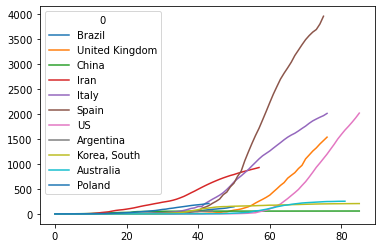

In [8]:
shifted_df_transp.plot()

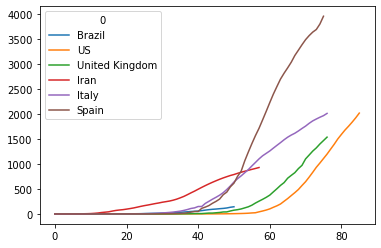

In [9]:
shifted_df_transp[['Brazil', 'US', 'United Kingdom', 'Iran', 'Italy', 'Spain']].plot()

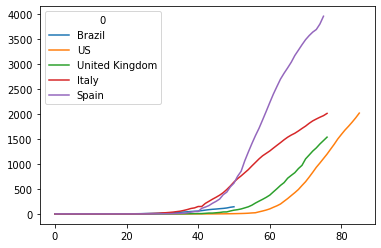

In [10]:
shifted_df_transp[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain']].plot()

Text(0.5, 0, 'days')

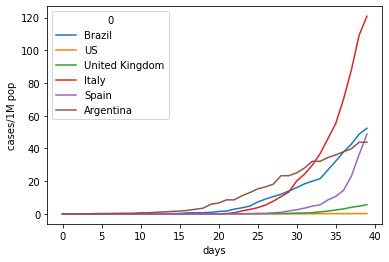

In [11]:
plot = shifted_df_transp[['Brazil', 'US', 'United Kingdom', 'Italy', 'Spain', 'Argentina']][:40].plot()
plot.set_ylabel('cases/1M pop')
plot.set_xlabel('days')

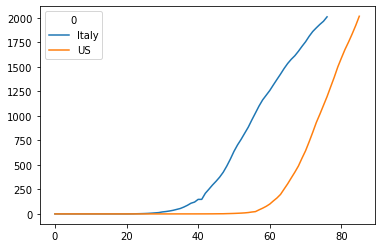

In [12]:
shifted_df_transp[['Italy', 'US']].plot()

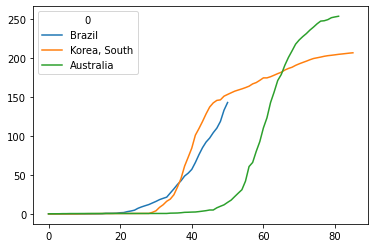

In [13]:
shifted_df_transp[['Brazil', 'Korea, South', 'Australia']].plot()

In [14]:
test_df = shifted_df_transp

In [15]:
test_df[['Australia']] = shifted_df_transp[['Australia']][20:].dropna().reset_index(drop=True)
test_df[['Australia']]

,Australia
0,0.589634
1,0.589634
2,0.589634
3,0.589634
4,0.589634
...,...
81,NaN
82,NaN
83,NaN
84,NaN


,Brazil,Australia
0,0.004705,0.589634
1,0.004705,0.589634
2,0.004705,0.589634
3,0.009409,0.589634
4,0.009409,0.589634
...,...,...
57,NaN,248.236079
58,NaN,249.651202
59,NaN,252.166975
60,NaN,253.149699


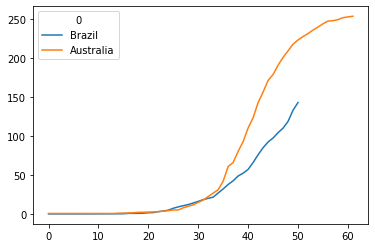

In [16]:
test_df[['Brazil', 'Australia']].plot()
test_df[['Brazil', 'Australia']].dropna(how='all')

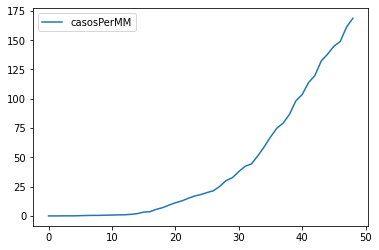

In [19]:
br_df = pd.read_csv('2020-04-22_BR.csv', delimiter = ';')
br_df = br_df[br_df.estado == 'RJ']
br_df = br_df[br_df.casosAcumulados != 0]
br_df = br_df.reset_index()
br_df[['casosPerMM']] = br_df[['casosAcumulados']]*1000000/(2*16460000)
br_df[['casosPerMM']].plot()

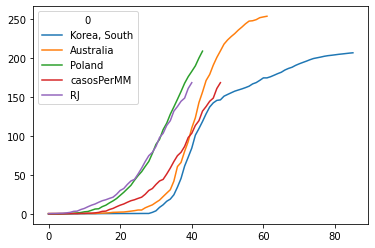

In [25]:
ax = shifted_df_transp[['Korea, South', 'Australia', 'Poland']].plot()
br_df[['casosPerMM']].plot(ax=ax)
test_df[['RJ']] = br_df[['casosPerMM']][8:].dropna().reset_index(drop=True)
test_df[['RJ']].plot(ax=ax)